In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.sparse.linalg as sps_linalg

import numpy as np
from numpy.linalg import inv
from scipy.linalg import sqrtm, eigh
import networkx as nx
import matplotlib.pyplot as plt

In [137]:
example1 = './data/example1.dat'
test = './data/test.dat'

with open(example1) as file:
  lines = [line.rstrip().split(',') for line in file]

# lines.append([6,11])
# lines.append([6,7])
# lines.append([7,8])
# lines.append([8,9])
# lines.append([9,10])
# lines.append([10,7])
# lines.append([11,12])
# lines.append([6,12])
# lines.append([5,12])
lines = np.array(lines, dtype=int) - 1
lines

array([[  0,   1],
       [  0,   2],
       [  0,   3],
       ...,
       [215, 234],
       [212, 234],
       [240, 234]])

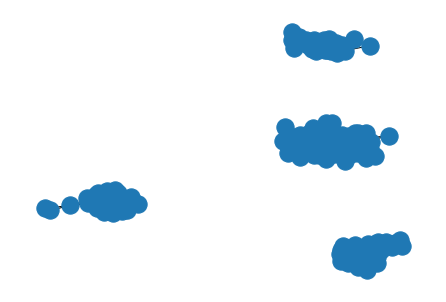

In [138]:
g = nx.Graph()

for edge in lines:
  g.add_edge(edge[0], edge[1])

# Drawing the graph
nx.draw(g)
plt.show()

In [139]:
# col1 = lines[:,0]
# col2 = lines[:,1]
maxID = lines.max()
maxID

A = np.zeros(shape=(maxID + 1, maxID + 1))

for edge in lines:
  fromNode = edge[0]
  toNode = edge[1]

  A[fromNode][toNode] = 1
  A[toNode][fromNode] = 1

A

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

[-5.36845247e+00 -4.99107051e+00 -4.85630233e+00 -4.75926944e+00
 -4.60609409e+00 -4.58001515e+00 -4.52692452e+00 -4.33751448e+00
 -4.27764887e+00 -4.20710906e+00 -4.10196724e+00 -4.06885247e+00
 -4.01498598e+00 -3.98378679e+00 -3.87545358e+00 -3.82120533e+00
 -3.70871255e+00 -3.69357057e+00 -3.60139182e+00 -3.56267845e+00
 -3.48316709e+00 -3.47576905e+00 -3.46010469e+00 -3.43321240e+00
 -3.39765043e+00 -3.31906105e+00 -3.21071378e+00 -3.20636894e+00
 -3.14944691e+00 -3.12241886e+00 -3.02921781e+00 -3.00940203e+00
 -2.95636107e+00 -2.89934230e+00 -2.89886324e+00 -2.83294596e+00
 -2.77378364e+00 -2.72628548e+00 -2.71622957e+00 -2.64766313e+00
 -2.62022370e+00 -2.59052426e+00 -2.55350452e+00 -2.51409198e+00
 -2.47320097e+00 -2.46515694e+00 -2.46310319e+00 -2.44194464e+00
 -2.40459423e+00 -2.38893547e+00 -2.32178115e+00 -2.25694464e+00
 -2.17020135e+00 -2.12709734e+00 -2.12680413e+00 -2.09058685e+00
 -2.06042540e+00 -1.99873950e+00 -1.99315646e+00 -1.94073928e+00
 -1.90848573e+00 -1.85580

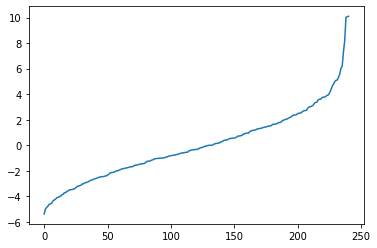

In [141]:
# eigenvalues and eigenvectors
eigenVals, eigenVecs = np.linalg.eig(A)

# sort these based on the eigenvalues
eigenVecs = eigenVecs[:,np.argsort(eigenVals)]
eigenVals = eigenVals[np.argsort(eigenVals)]
print(eigenVals)
print(len(eigenVecs))

plt.plot(range(len(eigenVals)), eigenVals)
plt.show()

## Graph Laplacian

In [142]:
D = np.diag(A.sum(axis=1))
D_norm = np.diag(1/A.sum(axis=1))
L = D-A
L
D
D_norm

array([[0.14285714, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.125     , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.2       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ]])

## Transition Matrix

In [130]:
# L = D - A
# M = D_norm x A (transition matrxi)


M = np.dot(D_norm, A)
M

array([[0.        , 0.5       , 0.5       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.33333333, 0.        , 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.33333333,
        0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.2       , 0.2       ,
        0.        , 0.2       , 0.        , 0.        , 0.        ,
        0.2       ,

## Power Iteration

In [12]:
v = np.zeros(shape=(maxID + 1, 1))
v[4] = 1
v

X = A.copy()

for i in range(20):
  v = np.dot(X, v)
  v = v/np.sum(v)
  print(v)

[[0. ]
 [0. ]
 [0. ]
 [0.5]
 [0. ]
 [0.5]]
[[0. ]
 [0.2]
 [0. ]
 [0.2]
 [0.4]
 [0.2]]
[[0.08333333]
 [0.08333333]
 [0.08333333]
 [0.33333333]
 [0.16666667]
 [0.25      ]]
[[0.06896552]
 [0.20689655]
 [0.06896552]
 [0.20689655]
 [0.24137931]
 [0.20689655]]
[[0.11428571]
 [0.14285714]
 [0.11428571]
 [0.27142857]
 [0.17142857]
 [0.18571429]]
[[0.10650888]
 [0.20710059]
 [0.10650888]
 [0.20710059]
 [0.18934911]
 [0.18343195]]
[[0.12990196]
 [0.17401961]
 [0.12990196]
 [0.24019608]
 [0.16176471]
 [0.16421569]]
[[0.12588832]
 [0.2071066 ]
 [0.12588832]
 [0.2071066 ]
 [0.16751269]
 [0.16649746]]
[[0.13793103]
 [0.19007569]
 [0.13793103]
 [0.22413793]
 [0.15475189]
 [0.15517241]]
[[0.13586483]
 [0.20710678]
 [0.13586483]
 [0.20710678]
 [0.15711549]
 [0.1569413 ]]
[[0.14206349]
 [0.19834055]
 [0.14206349]
 [0.21587302]
 [0.15079365]
 [0.1508658 ]]
[[0.14099997]
 [0.20710678]
 [0.14099997]
 [0.20710678]
 [0.15190819]
 [0.15187831]]
[[0.14419054]
 [0.20259464]
 [0.14419054]
 [0.21161893]
 [0.1486

[-9.33164749e-01 -6.42703602e-01 -5.40933169e-01 -5.00000000e-01
 -3.37033234e-01 -1.30920672e-01  8.08698010e-18  7.14603529e-02
  2.63444207e-01  8.30408465e-01  9.19442402e-01  1.00000000e+00]
12


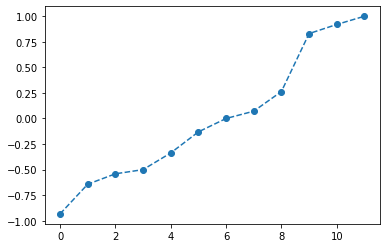

In [131]:
# eigenvalues and eigenvectors
eigenVals, eigenVecs = np.linalg.eig(M)

# sort these based on the eigenvalues
eigenVecs = eigenVecs[:,np.argsort(eigenVals)]
eigenVals = eigenVals[np.argsort(eigenVals)]
print(eigenVals)
print(len(eigenVecs))
plt.plot(range(len(eigenVals)), eigenVals, linestyle='--', marker='o')
plt.show()

## Eigenvalues

[-2.78902778e-17  1.78599902e-01  4.28269806e-01  1.86009957e+00
  2.00000000e+00  2.39641215e+00  3.00000000e+00  3.00000000e+00
  4.00000000e+00  4.18287032e+00  4.73754302e+00  6.21620523e+00]
12


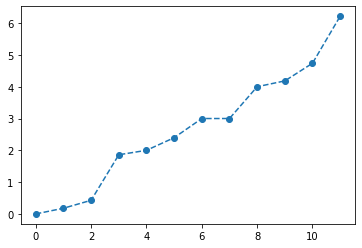

In [132]:
# eigenvalues and eigenvectors
eigenVals, eigenVecs = np.linalg.eig(L)

# sort these based on the eigenvalues
eigenVecs = eigenVecs[:,np.argsort(eigenVals)]
eigenVals = eigenVals[np.argsort(eigenVals)]
print(eigenVals)
print(len(eigenVecs))
plt.plot(range(len(eigenVals)), eigenVals, linestyle='--', marker='o')
plt.show()

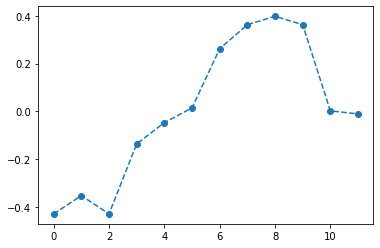

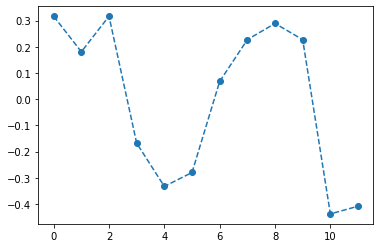

In [133]:
plot = eigenVecs[:,1]
plt.plot(range(len(plot)), plot, linestyle='--', marker='o')
plt.show()

plot = eigenVecs[:,2]
plt.plot(range(len(plot)), plot, linestyle='--', marker='o')
plt.show()

1


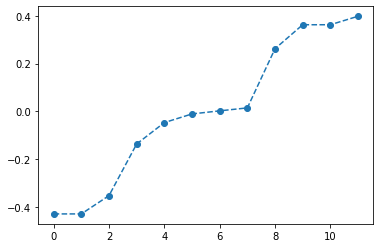

[-0.42808832 -0.35163179 -0.42808832 -0.13591732 -0.04663315  0.0147878
  0.26190327  0.36207306  0.39757663  0.36207306  0.00238637 -0.01044126]


In [134]:
fiedlerIndex = 0

for i in range(len(eigenVals)):
  if eigenVals[i] > 0:
    fiedlerIndex = i
    break

print(fiedlerIndex)

import matplotlib.pyplot as plt

fiedlerVector = eigenVecs[:,1]

xpoints = range(0, len(A))
ypoints = np.sort(fiedlerVector)

plt.plot(xpoints, ypoints, linestyle='--', marker='o')
plt.show()
print(eigenVecs[:,1])

## Random Article

https://towardsdatascience.com/spectral-clustering-aba2640c0d5b

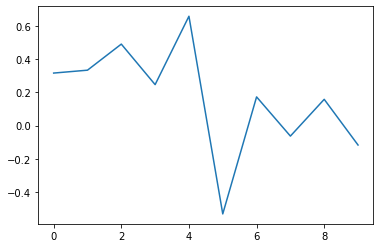

In [363]:
# Adjacency Matrix:
A =  np.array([[0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
              [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
              [1, 0, 0, 1, 1, 0, 1, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

# diagonal matrix
D = np.diag(A.sum(axis=1))

# graph laplacian
L = D-A

# eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(L)

# sort these based on the eigenvalues
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]

import matplotlib.pyplot as plt

xpoints = range(0, 10)
ypoints = (vecs[1])

plt.plot(xpoints, ypoints)
plt.show()